<a href="https://colab.research.google.com/github/kelly0924xu/Advanced-Data-Analysis/blob/master/difference_alphafold_plotting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
from scipy.stats import mannwhitneyu

# --- 1. Load the CSV ---
df = pd.read_csv("WT_var_full_4c_AD.csv")

# Drop the auto-index column if it exists
if "Unnamed: 0" in df.columns:
    df = df.drop(columns=["Unnamed: 0"])

print("Shape:", df.shape)
print("Columns:", df.columns.tolist())

# --- 2. Quick look at the data ---
display(df.head())
display(df.info())
display(df.describe(include="all").transpose())

# --- 3. Uniqueness checks for IDs ---
print("Unique ids:", df["id"].nunique())
print("Unique var_ids:", df["var_id"].nunique())

# See if each id has more than one AF2_file_var
id_af2_counts = df.groupby("id")["AF2_file_var"].nunique().value_counts()
print("\nAF2_file_var counts per id:")
print(id_af2_counts.head())

# --- 4. Spot-check a few IDs with >1 AF2_file_var ---
multi_af2_ids = df.groupby("id")["AF2_file_var"].nunique()
multi_af2_ids = multi_af2_ids[multi_af2_ids > 1].index

print("\nExample ids with >1 AF2_file_var:", multi_af2_ids[:5].tolist())

for i in multi_af2_ids[:3]:   # show first 3 as example
    display(df[df["id"] == i])

Shape: (656, 81)
Columns: ['...1', 'Entry', 'Entry Name', 'AF_structure', 'Protein names', 'Gene Names', 'Length', 'Transmembrane', 'int_count', 'enzyme', '3D_avail', 'soluble', 'uniprot', 'AF2_file_WT', 'WT_length', 'net_charge_WT_FL', 'aromaticity_WT_FL', 'pI_WT_FL', 'abs_sasa_WT_FL', 'plddt_mean_WT_FL', 'plddt_sd_WT_FL', 'abs_sasa_mean_WT_FL', 'abs_sasa_sd_WT_FL', 'id', 'chr', 'pos', 'ref', 'alt', 'var_id', 'AF2_file_var', 'var_length_var_FL', 'net_charge_var_FL', 'aromaticity_var_FL', 'pI_var_FL', 'abs_sasa_var_FL', 'plddt_mean_var_FL', 'plddt_sd_var_FL', 'abs_sasa_mean_var_FL', 'abs_sasa_sd_var_FL', 'aa_M_WT_FL', 'aa_V_WT_FL', 'aa_K_WT_FL', 'aa_L_WT_FL', 'aa_A_WT_FL', 'aa_N_WT_FL', 'aa_P_WT_FL', 'aa_Y_WT_FL', 'aa_T_WT_FL', 'aa_E_WT_FL', 'aa_W_WT_FL', 'aa_I_WT_FL', 'aa_Q_WT_FL', 'aa_R_WT_FL', 'aa_S_WT_FL', 'aa_C_WT_FL', 'aa_H_WT_FL', 'aa_G_WT_FL', 'aa_D_WT_FL', 'aa_F_WT_FL', 'aa_M_var_FL', 'aa_A_var_FL', 'aa_E_var_FL', 'aa_P_var_FL', 'aa_R_var_FL', 'aa_L_var_FL', 'aa_G_var_FL', 'aa

,...1,Entry,Entry Name,AF_structure,Protein names,Gene Names,Length,Transmembrane,int_count,enzyme,...,aa_C_var_FL,aa_H_var_FL,aa_K_var_FL,aa_Y_var_FL,aa_N_var_FL,aa_W_var_FL,aa_F_var_FL,aa_I_var_FL,source,key
0,86,Q9Y4D2,DGLA_HUMAN,AF-Q9Y4D2-F1-model_v4.pdb,Diacylglycerol lipase-alpha (DAGL-alpha) (DGL-...,DAGLA C11orf11 KIAA0659 NSDDR,1042,"TRANSMEM 23..43; /note=""Helical""; /evidence=""E...",10,1,...,3.01,2.53,4.10,3.61,2.65,1.33,3.37,4.94,minus1,11:061743793|TGTGCTGGAGC|T
1,88,Q9Y4D2,DGLA_HUMAN,AF-Q9Y4D2-F1-model_v4.pdb,Diacylglycerol lipase-alpha (DAGL-alpha) (DGL-...,DAGLA C11orf11 KIAA0659 NSDDR,1042,"TRANSMEM 23..43; /note=""Helical""; /evidence=""E...",10,1,...,3.00,2.64,3.96,3.72,2.64,1.32,3.48,5.16,minus1,11:061743840|TC|T
2,90,O14521,DHSD_HUMAN,AF-O14521-F1-model_v4.pdb,Succinate dehydrogenase [ubiquinone] cytochrom...,SDHD SDH4,159,"TRANSMEM 64..85; /note=""Helical""; /evidence=""E...",1,0,...,2.38,5.56,2.38,NaN,NaN,4.76,3.97,3.17,minus1,11:112088934|GCTTCCGGCTGCTTATTTGAATC|G
3,92,O14521,DHSD_HUMAN,AF-O14521-F1-model_v4.pdb,Succinate dehydrogenase [ubiquinone] cytochrom...,SDHD SDH4,159,"TRANSMEM 64..85; /note=""Helical""; /evidence=""E...",1,0,...,2.99,5.22,2.24,0.75,0.75,4.48,3.73,2.99,minus1,11:112088960|G|GCT
4,94,O14521,DHSD_HUMAN,AF-O14521-F1-model_v4.pdb,Succinate dehydrogenase [ubiquinone] cytochrom...,SDHD SDH4,159,"TRANSMEM 64..85; /note=""Helical""; /evidence=""E...",1,0,...,2.99,5.22,2.24,0.75,0.75,3.73,3.73,2.99,minus1,11:112088969|T|TGG


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 656 entries, 0 to 655
Data columns (total 81 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ...1                  656 non-null    int64  
 1   Entry                 656 non-null    object 
 2   Entry Name            656 non-null    object 
 3   AF_structure          656 non-null    object 
 4   Protein names         656 non-null    object 
 5   Gene Names            656 non-null    object 
 6   Length                656 non-null    int64  
 7   Transmembrane         205 non-null    object 
 8   int_count             656 non-null    int64  
 9   enzyme                656 non-null    int64  
 10  3D_avail              656 non-null    int64  
 11  soluble               656 non-null    int64  
 12  uniprot               656 non-null    object 
 13  AF2_file_WT           656 non-null    object 
 14  WT_length             656 non-null    int64  
 15  net_charge_WT_FL      6

None

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
...1,656.0,NaN,NaN,NaN,2144.932927,1473.357919,86.0,788.5,1996.0,3433.25,4853.0
Entry,656,151,Q9H9D4,34,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Entry Name,656,151,ZN408_HUMAN,34,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AF_structure,656,151,AF-Q9H9D4-F1-model_v4.pdb,34,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Protein names,656,151,Zinc finger protein 408 (PR domain zinc finger...,34,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
aa_W_var_FL,648.0,NaN,NaN,NaN,1.571512,0.96596,0.15,0.87,1.43,1.925,6.0
aa_F_var_FL,651.0,NaN,NaN,NaN,3.594962,1.657597,0.36,2.42,3.43,4.49,11.0
aa_I_var_FL,654.0,NaN,NaN,NaN,3.98922,1.860324,0.46,2.58,3.755,5.4275,8.73
source,656,6,minus1_control,385,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Unique ids: 656
Unique var_ids: 656

AF2_file_var counts per id:
AF2_file_var
1    656
Name: count, dtype: int64

Example ids with >1 AF2_file_var: []


In [3]:
# --- Clean up df first ---
# Drop any index-like columns if present
df = df.drop(columns=["...1"], errors="ignore")

# Columns to compare (ignore AF2_file_var itself)
cols_no_af2 = [c for c in df.columns if c != "AF2_file_var"]

# Function: check if rows within a group differ only by AF2_file_var
def differs_only_by_af2(group):
    # Drop AF2_file_var and check if all remaining rows collapse to one unique row
    return group[cols_no_af2].drop_duplicates().shape[0] == 1

# Find ids with exactly 2 AF2_file_var values
multi_af2_ids = df.groupby("id")["AF2_file_var"].nunique()
multi_af2_ids = multi_af2_ids[multi_af2_ids == 2].index

# Apply check
check = df[df["id"].isin(multi_af2_ids)].groupby("id").apply(differs_only_by_af2)

print("IDs with exactly 2 AF2_file_var values:", len(multi_af2_ids))
print("… of which differ ONLY by AF2_file_var:", check.sum())
print("… of which differ in other columns too:", (~check).sum())

# Show a few examples if there are problems
problem_ids = check[~check].index.tolist()
if problem_ids:
    print("\nExample of ids with differences outside AF2_file_var:", problem_ids[:5])
    for i in problem_ids[:3]:
        display(df[df["id"] == i])

IDs with exactly 2 AF2_file_var values: 0
… of which differ ONLY by AF2_file_var: Entry              0
Entry Name         0
AF_structure       0
Protein names      0
Gene Names         0
                ... 
aa_W_var_FL      0.0
aa_F_var_FL      0.0
aa_I_var_FL      0.0
source             0
key                0
Length: 80, dtype: object
… of which differ in other columns too: Entry              0
Entry Name         0
AF_structure       0
Protein names      0
Gene Names         0
                ... 
aa_W_var_FL      0.0
aa_F_var_FL      0.0
aa_I_var_FL      0.0
source             0
key                0
Length: 80, dtype: object


/tmp/ipython-input-1049072889.py:18: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  check = df[df["id"].isin(multi_af2_ids)].groupby("id").apply(differs_only_by_af2)


In [4]:
# columns to aggregate (everything except AF2_file_var and the group key id)
agg_cols = [c for c in df.columns if c not in ["AF2_file_var", "id"]]

df_collapsed = (
    df.groupby("id", as_index=False)
      .agg({**{c: "first" for c in agg_cols}, "AF2_file_var": list})
)

print("Original shape:", df.shape)
print("Collapsed shape:", df_collapsed.shape)
df_collapsed["source"].value_counts()

Original shape: (656, 80)
Collapsed shape: (656, 80)


,count
source,
minus1_control,385
minus1,116
plus1,88
plus1_control,56
snv,9
snv_control,2


In [5]:
# Identify WT and Var pairs based on column names
pairs = [
    ("aromaticity_WT_FL", "aromaticity_var_FL"),
    ("pI_WT_FL", "pI_var_FL"),
    ("plddt_mean_WT_FL", "plddt_mean_var_FL"),
    ("abs_sasa_mean_WT_FL", "abs_sasa_mean_var_FL"),
    ("net_charge_WT_FL", "net_charge_var_FL")
]

# Add difference columns
for wt_col, var_col in pairs:
    diff_col = wt_col.replace("_WT_FL", "_Diff")  # e.g. aromaticity_Diff
    df_collapsed[diff_col] = df_collapsed[var_col] - df_collapsed[wt_col]

# Quick check of new columns
print(df_collapsed[[c for c in df_collapsed.columns if c.endswith("_Diff")]].head())

   aromaticity_Diff  pI_Diff  plddt_mean_Diff  abs_sasa_mean_Diff  \
0                 2     0.37           -6.719               3.524   
1                 2    -0.15           -3.776               1.456   
2                 2     0.09           -1.785               1.394   
3                 2     0.01           -1.639               1.890   
4                 1     0.06           -1.438               3.137   

   net_charge_Diff  
0                2  
1               -5  
2                3  
3                0  
4                2  


In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from matplotlib.patches import Patch
import matplotlib.colors as mcolors

# --- color utils ---
def lighten_color(color, amount=0.55):
    """Lighten a hex/rgb color by mixing with white."""
    r, g, b = mcolors.to_rgb(color)
    return (1 - amount) + amount * r, (1 - amount) + amount * g, (1 - amount) + amount * b

FAMILY_COLOR = {'Minus1':'#4472C4', 'Plus1':'#C65911', 'Nonsense':'#70AD47'}

def _prep_from_source(df, diff_col="pI_Diff"):
    """Adapt old-data expectations to collapsed_df columns."""
    out = df.copy()

    # derive group label from 'source'
    # Candidate = not *_control, Control = *_control
    out["group"] = out["source"].astype(str)

    # standardize naming
    out["group"] = out["group"].str.replace("snv_control", "Nonsense_Control", case=False, regex=False)
    out["group"] = out["group"].str.replace("snv", "Nonsense", case=False, regex=False)
    out["group"] = out["group"].str.replace("minus1_control", "Minus1_Control", case=False, regex=False)
    out["group"] = out["group"].str.replace("plus1_control", "Plus1_Control", case=False, regex=False)
    out["group"] = out["group"].str.replace("minus1", "Minus1", case=False, regex=False)
    out["group"] = out["group"].str.replace("plus1", "Plus1", case=False, regex=False)

    # derive family/status like before
    out["family"] = out["group"].str.replace("_Control", "", regex=False)
    out["status"] = np.where(out["group"].str.endswith("_Control"), "Control", "VariantClass")

    # ensure the diff col exists
    if diff_col not in out.columns:
        raise ValueError(f"'{diff_col}' not found in dataframe. Compute Var-WT difference first.")
    out = out.rename(columns={diff_col: "pI_diff"})  # the plotting code expects 'pI_diff'
    return out

def plot_pi_diff_vs_control(
    collapsed_df,                  # <--- use your new dataframe here
    diff_col="pI_Diff",            # column with Var - WT (change to other *_Diff as needed)
    families=('Minus1','Plus1','Nonsense'),
    figsize=(12,6),
    label_pad=1.0,
    savepath=None
):
    """
    For collapsed_df with columns:
      - 'source' (e.g., minus1, minus1_control, snv, snv_control, plus1, plus1_control)
      - <diff_col> (Var - WT), e.g., 'pI_Diff'
    """
    # adapt to old expectations
    df = _prep_from_source(collapsed_df, diff_col=diff_col)

    # keep only target families
    plot_df = df[df['family'].isin(families)].copy()
    if plot_df.empty:
        print("Nothing to plot: no rows for specified families.")
        return None, None

    # --- figure / axes ---
    fig, ax = plt.subplots(figsize=figsize)
    ax.grid(True, axis='y', alpha=0.3, linestyle='--'); ax.set_axisbelow(True)

    # y-range & single annotation height
    y_all = plot_df['pI_diff'].to_numpy()
    y_min, y_max = (np.nanmin(y_all), np.nanmax(y_all)) if np.isfinite(y_all).any() else (0, 1)
    base_rng = (y_max - y_min) if y_max > y_min else max(1.0, abs(y_max))
    pad = 0.15 * base_rng
    ax.set_ylim(y_min - 0.05*base_rng, y_max + 2*pad)
    y_annot = y_max + label_pad*pad

    # positions per family
    xpos = {fam:i for i, fam in enumerate(families)}

    # draw boxes & stats per family (with family colors / lightened control)
    for fam in families:
        sub = plot_df[plot_df['family']==fam].copy()
        if sub.empty:
            continue
        xi = xpos[fam]
        base = FAMILY_COLOR.get(fam, '#888')
        pal  = {'VariantClass': base, 'Control': lighten_color(base, 0.55)}

        sub['xslot'] = xi
        sns.boxplot(
            data=sub, x='xslot', y='pI_diff',
            hue='status', hue_order=['VariantClass','Control'],
            order=[xi], dodge=True, width=0.6, palette=pal, ax=ax, legend=False
        )

        v = sub.loc[sub['status']=='VariantClass','pI_diff'].to_numpy()
        c = sub.loc[sub['status']=='Control','pI_diff'].to_numpy()
        n_v, n_c = np.sum(~np.isnan(v)), np.sum(~np.isnan(c))
        if n_v and n_c:
            # t-test like your prior code (you can swap to MWU if you prefer)
            #_, p = stats.ttest_ind(v, c, equal_var=False, nan_policy='omit')
            _, p = mannwhitneyu(v, c, alternative="two-sided")


            stars = '***' if p < 1e-3 else '**' if p < 1e-2 else '*' if p < 5e-2 else 'ns'
            ax.text(
                xi, y_annot,
                f"{stars}\nn={n_v}/{n_c}\np={p:.3g}",
                ha='center', va='bottom', fontsize=10,
                bbox=dict(boxstyle="round,pad=0.25", facecolor='white', alpha=0.9)
            )

    # cosmetics
    ax.set_xlim(-0.5, len(families)-0.5)
    ax.set_xticks(range(len(families)))
    ax.set_xticklabels(families, rotation=20, ha='right')
    ax.set_xlabel("Variant Type", fontsize=11, fontweight='bold')
    ax.set_ylabel(diff_col, fontsize=11, fontweight='bold')
    ax.set_title(f"{diff_col} (Var − WT): Candidate vs Control (Full length)",
                 fontsize=14, fontweight='bold', pad=10)

    # simple legend (Candidate vs Control)
    handles = [
        Patch(facecolor='#6e6e6e', edgecolor='k', label='Candidate'),
        Patch(facecolor='#cfcfcf', edgecolor='k', label='Control'),
    ]
    ax.legend(handles=handles, title="Group", title_fontsize=11, fontsize=10,
              loc='upper left', bbox_to_anchor=(1.01, 1.0), borderaxespad=0.)

    plt.tight_layout()
    if savepath:
        fig.savefig(savepath, dpi=300, bbox_inches='tight')
        print("Saved:", savepath)
    return fig, ax


Saved: pI_Diff_Candidate_vs_Control.png
Saved: plddt_mean_Diff_Candidate_vs_Control.png
Saved: abs_sasa_mean_Diff_Candidate_vs_Control.png
Saved: aromaticity_Diff_Candidate_vs_Control.png
Saved: net_charge_Diff_Candidate_vs_Control.png


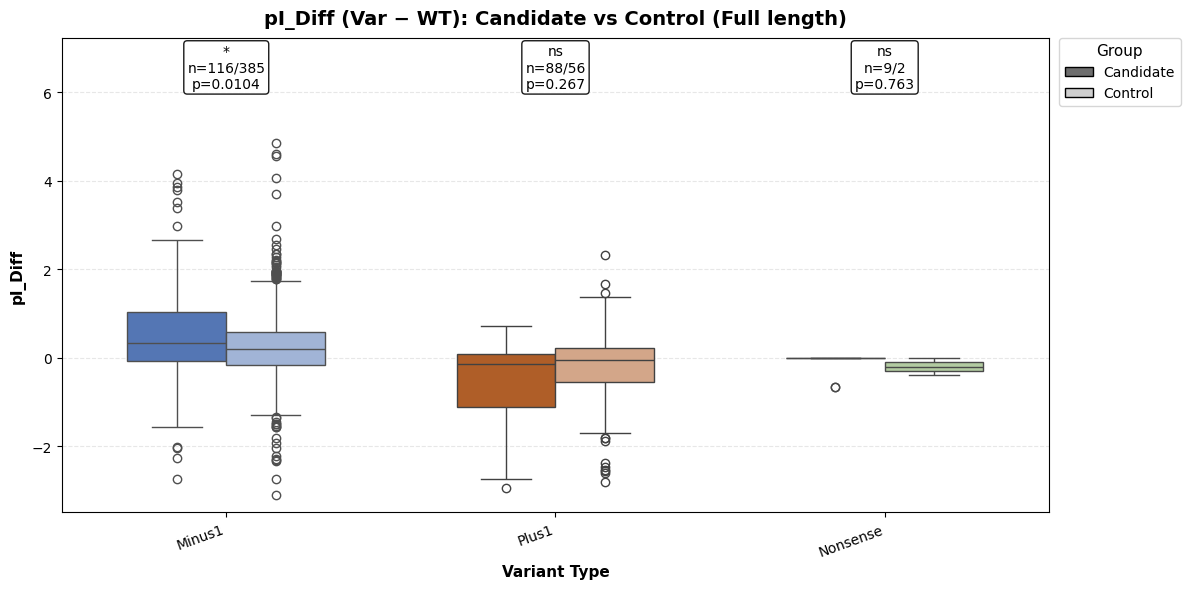

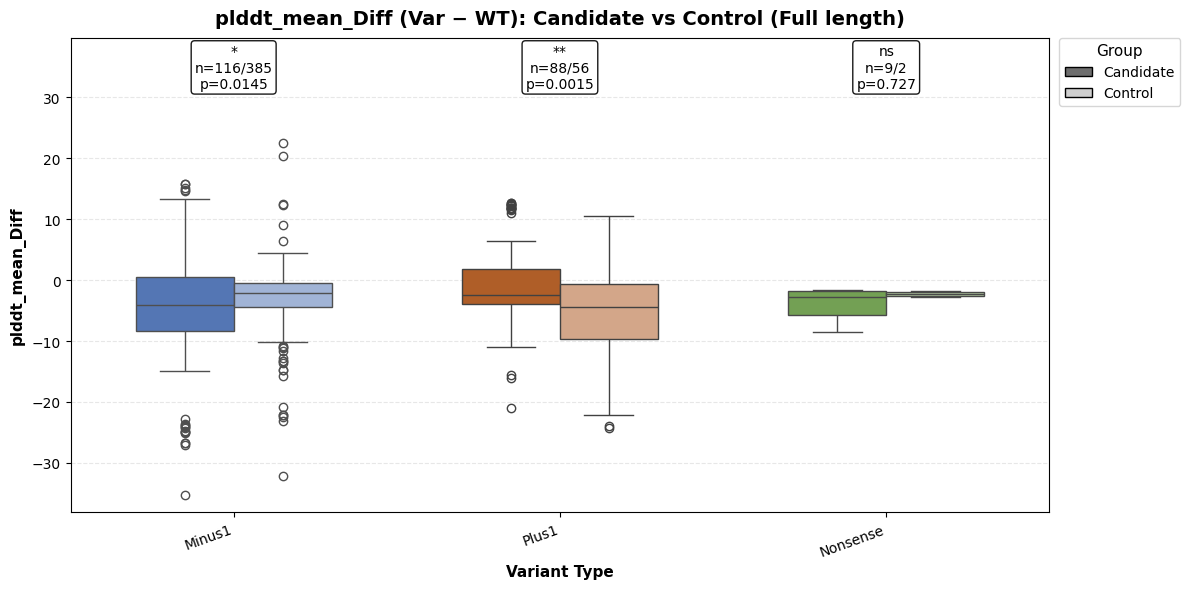

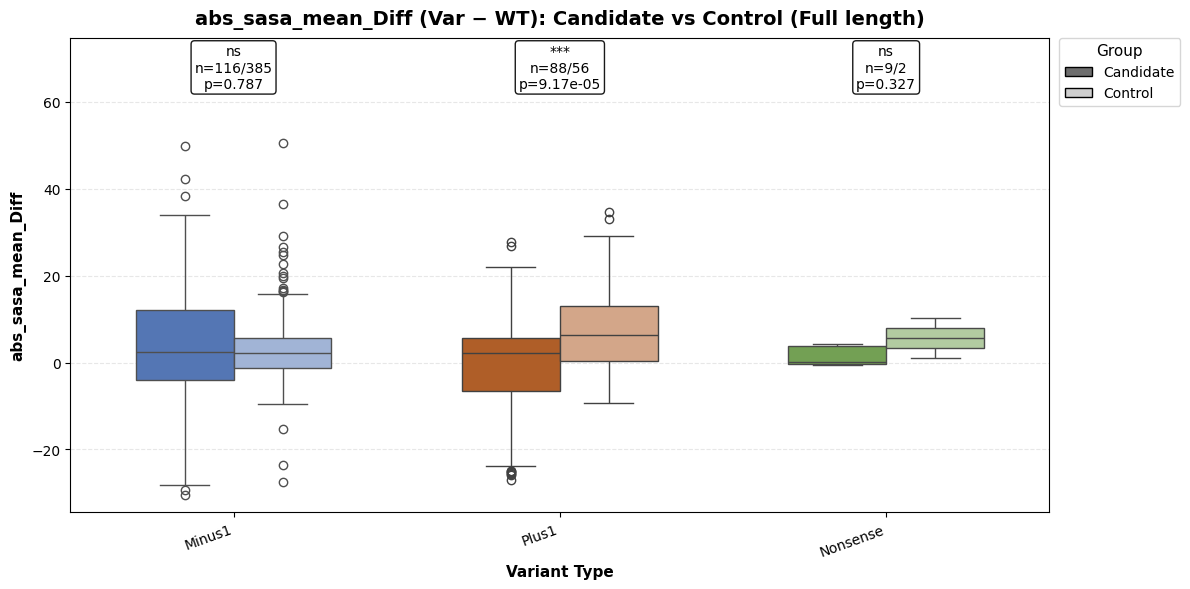

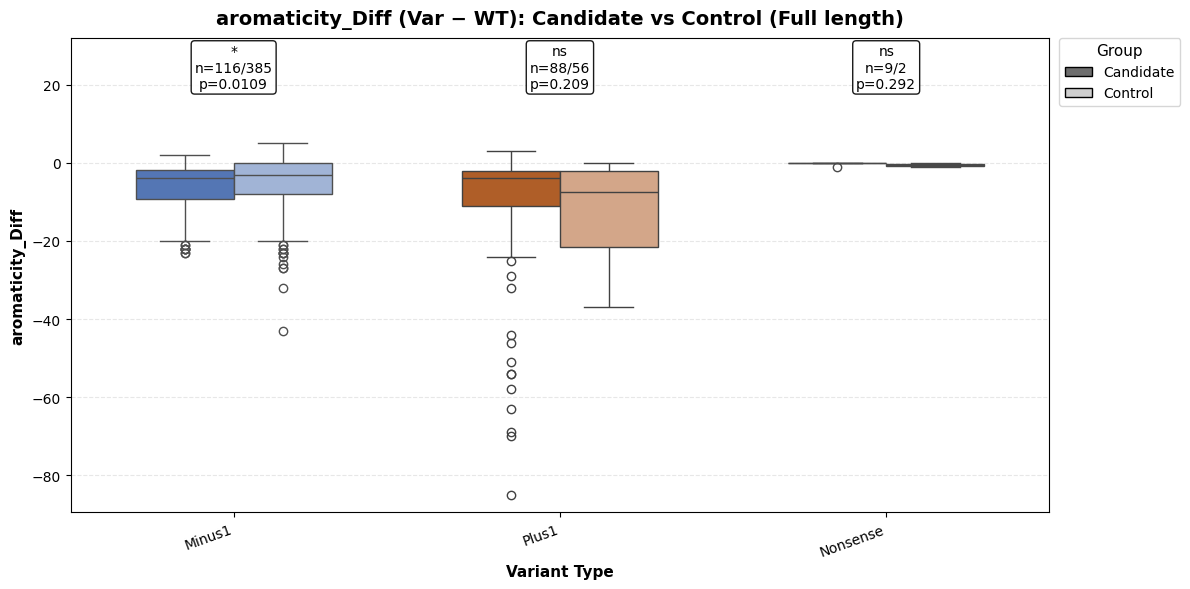

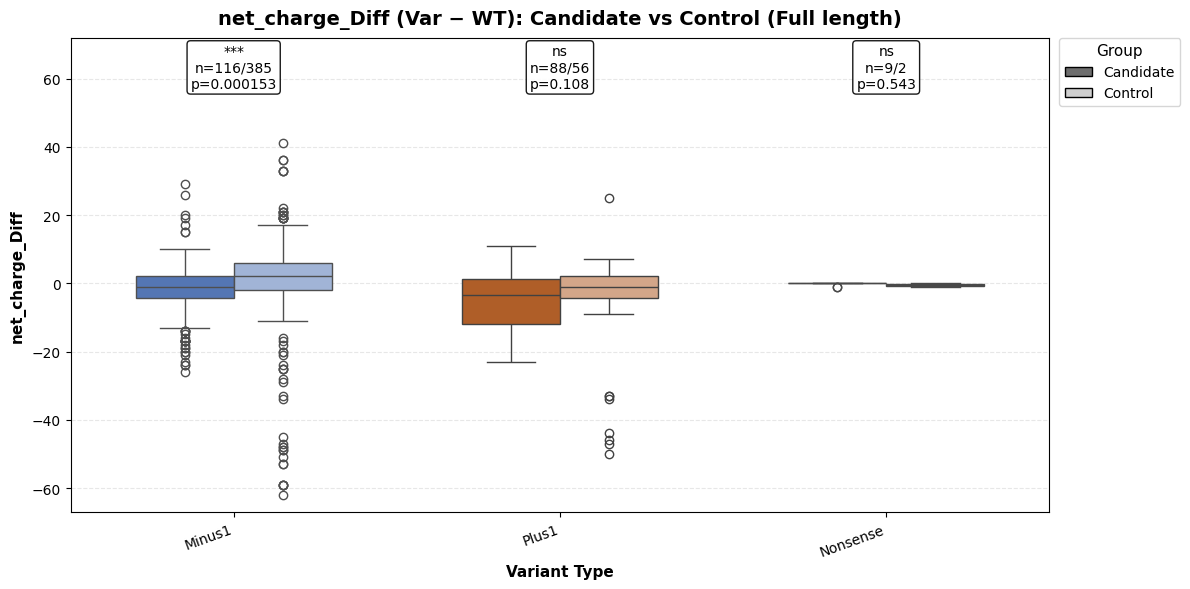

In [8]:
diff_metrics = [
    "pI_Diff",
    "plddt_mean_Diff",
    "abs_sasa_mean_Diff",
    "aromaticity_Diff",
    "net_charge_Diff"
]

for m in diff_metrics:
    fname = f"{m}_Candidate_vs_Control.png"
    plot_pi_diff_vs_control(df_collapsed, diff_col=m, savepath=fname)

In [9]:

# --- 1. Load the CSV ---
df_NMD = pd.read_csv("WT_var_NMD_4c_AD.csv")

# Drop the auto-index column if it exists
if "...1" in df_NMD.columns:
    df_NMD = df_NMD.drop(columns=["...1"])

print("Shape:", df_NMD.shape)
print("Columns:", df_NMD.columns.tolist())

# --- 2. Quick look at the data ---
display(df_NMD.head())
display(df_NMD.info())
display(df_NMD.describe(include="all").transpose())

# --- 3. Uniqueness checks for IDs ---
print("Unique ids:", df_NMD["id"].nunique())

# Collapse NMD df to unique IDs
df_NMD_unique = df_NMD.groupby("id").first().reset_index()

print("Original rows:", df_NMD.shape[0])
print("Unique IDs:", df_NMD_unique.shape[0])

Shape: (656, 75)
Columns: ['Unnamed: 0', 'id', 'chr', 'pos', 'ref', 'alt', 'uniprot', 'AF2_file_WT', 'WT_length', 'nmd_length_loss_in_WT', 'nmd_length_in_WT', 'nmd_start_x', 'net_charge_WT_nmd', 'aromaticity_WT_nmd', 'pI_WT_nmd', 'plddt_mean_WT_nmd', 'plddt_std_WT_nmd', 'total_sasa_WT_nmd', 'max_sasa_WT_nmd', 'rel_sasa_WT_nmd', 'AF2_file_var', 'var_length', 'nmd_length_loss_in_var', 'nmd_length_in_var', 'nmd_start_y', 'net_charge_vars_nmd', 'aromaticity_vars_nmd', 'pI_vars_nmd', 'plddt_mean_vars_nmd', 'plddt_std_vars_nmd', 'total_sasa_var_nmd', 'max_sasa_var_nmd', 'rel_sasa_var_nmd', 'aa_AA_P_WT_nmd', 'aa_AA_G_WT_nmd', 'aa_AA_K_WT_nmd', 'aa_AA_R_WT_nmd', 'aa_AA_Q_WT_nmd', 'aa_AA_T_WT_nmd', 'aa_AA_E_WT_nmd', 'aa_AA_D_WT_nmd', 'aa_AA_N_WT_nmd', 'aa_AA_H_WT_nmd', 'aa_AA_C_WT_nmd', 'aa_AA_F_WT_nmd', 'aa_AA_A_WT_nmd', 'aa_AA_M_WT_nmd', 'aa_AA_S_WT_nmd', 'aa_AA_L_WT_nmd', 'aa_AA_V_WT_nmd', 'aa_AA_W_WT_nmd', 'aa_AA_Y_WT_nmd', 'aa_AA_I_WT_nmd', 'aa_AA_L_vars_nmd', 'aa_AA_G_vars_nmd', 'aa_AA_R_

,Unnamed: 0,id,chr,pos,ref,alt,uniprot,AF2_file_WT,WT_length,nmd_length_loss_in_WT,...,aa_AA_V_vars_nmd,aa_AA_P_vars_nmd,aa_AA_N_vars_nmd,aa_AA_C_vars_nmd,aa_AA_H_vars_nmd,aa_AA_F_vars_nmd,aa_AA_W_vars_nmd,aa_AA_Y_vars_nmd,source,key
0,57,11_061743793_TGTGCTGGAGC_T,11,61743793,TGTGCTGGAGC,T,Q9Y4D2,AF-Q9Y4D2-F1-model_v4_fixed,1042,230,...,5.26,15.79,NaN,NaN,5.26,NaN,NaN,NaN,minus1,11:061743793|TGTGCTGGAGC|T
1,58,11_061743840_TC_T,11,61743840,TC,T,Q9Y4D2,AF-Q9Y4D2-F1-model_v4_fixed,1042,215,...,NaN,28.57,NaN,NaN,14.29,NaN,NaN,NaN,minus1,11:061743840|TC|T
2,59,11_112088934_GCTTCCGGCTGCTTATTTGAATC_G,11,112088934,GCTTCCGGCTGCTTATTTGAATC,G,O14521,AF-O14521-F1-model_v4_fixed,159,79,...,2.13,8.51,NaN,2.13,2.13,8.51,6.38,NaN,minus1,11:112088934|GCTTCCGGCTGCTTATTTGAATC|G
3,60,11_112088960_G_GCT,11,112088960,G,GCT,O14521,AF-O14521-F1-model_v4_fixed,159,71,...,2.13,8.51,NaN,4.26,2.13,8.51,6.38,NaN,minus1,11:112088960|G|GCT
4,61,11_112088969_T_TGG,11,112088969,T,TGG,O14521,AF-O14521-F1-model_v4_fixed,159,68,...,2.27,9.09,NaN,2.27,2.27,9.09,4.55,NaN,minus1,11:112088969|T|TGG


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 656 entries, 0 to 655
Data columns (total 75 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              656 non-null    int64  
 1   id                      656 non-null    object 
 2   chr                     656 non-null    int64  
 3   pos                     656 non-null    int64  
 4   ref                     656 non-null    object 
 5   alt                     656 non-null    object 
 6   uniprot                 656 non-null    object 
 7   AF2_file_WT             656 non-null    object 
 8   WT_length               656 non-null    int64  
 9   nmd_length_loss_in_WT   656 non-null    int64  
 10  nmd_length_in_WT        656 non-null    int64  
 11  nmd_start_x             656 non-null    int64  
 12  net_charge_WT_nmd       656 non-null    int64  
 13  aromaticity_WT_nmd      656 non-null    int64  
 14  pI_WT_nmd               656 non-null    fl

None

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Unnamed: 0,656.0,NaN,NaN,NaN,1281.582317,912.835587,57.0,437.75,1168.5,2076.25,3013.0
id,656,656,17_029254235_G_GT,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
chr,656.0,NaN,NaN,NaN,9.841463,6.19622,1.0,4.0,10.0,16.0,22.0
pos,656.0,NaN,NaN,NaN,77907047.657012,55860084.08271,613979.0,36676318.0,60663286.0,117201232.25,232534315.0
ref,656,134,C,50,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
aa_AA_F_vars_nmd,214.0,NaN,NaN,NaN,5.824953,6.064292,0.52,1.82,3.92,7.69,50.0
aa_AA_W_vars_nmd,285.0,NaN,NaN,NaN,7.273719,5.84019,0.52,3.37,5.93,8.82,50.0
aa_AA_Y_vars_nmd,155.0,NaN,NaN,NaN,5.363677,5.715834,0.56,1.835,3.57,5.88,33.33
source,656,6,minus1_control,385,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Unique ids: 656
Original rows: 656
Unique IDs: 656


In [10]:
# Identify WT and Var pairs based on column names
pairs = [
    ("aromaticity_WT_nmd", "aromaticity_vars_nmd"),
    ("pI_WT_nmd", "pI_vars_nmd"),
    ("plddt_mean_WT_nmd", "plddt_mean_vars_nmd"),
    ("net_charge_WT_nmd", "net_charge_vars_nmd"),
    ("rel_sasa_WT_nmd", "rel_sasa_var_nmd")
]



# Add difference columns
for wt_col, var_col in pairs:
    diff_col = wt_col.replace("_WT_nmd", "_Diff")  # e.g. aromaticity_Diff
    df_NMD_unique[diff_col] = df_NMD_unique[var_col] - df_NMD_unique[wt_col]

# Quick check of new columns
print(df_NMD_unique[[c for c in df_NMD_unique.columns if c.endswith("_Diff")]].head())

   aromaticity_Diff  pI_Diff  plddt_mean_Diff  net_charge_Diff  rel_sasa_Diff
0                 2     3.65          -48.272                2       0.187254
1                 2    -1.86          -23.403               -5       0.164385
2                 2     4.50          -20.677                3       0.213624
3                 2     0.76          -33.094                0       0.327421
4                 1     1.77          -41.305                2       0.355870


In [11]:
FAMILY_COLOR = {'Minus1':'#4472C4', 'Plus1':'#C65911', 'Nonsense':'#70AD47'}

def lighten_color(color, amount=0.55):
    r, g, b = mcolors.to_rgb(color)
    return (1 - amount) + amount*r, (1 - amount) + amount*g, (1 - amount) + amount*b

def plot_diff_candidate_vs_control_colorsafe(
    df, diff_col, metric_label=None, context_label="Full length",
    families=("Minus1","Plus1","Nonsense"), figsize=(12,6), savepath=None
):
    # ---- prep ----
    d = df.copy()
    g = d["source"].astype(str)
    g = g.str.replace("snv_control","Nonsense_Control",case=False,regex=False)
    g = g.str.replace("snv","Nonsense",case=False,regex=False)
    g = g.str.replace("minus1_control","Minus1_Control",case=False,regex=False)
    g = g.str.replace("plus1_control","Plus1_Control",case=False,regex=False)
    g = g.str.replace("minus1","Minus1",case=False,regex=False)
    g = g.str.replace("plus1","Plus1",case=False,regex=False)
    d["group"]  = g
    d["family"] = d["group"].str.replace("_Control","",regex=False)
    d["status"] = np.where(d["group"].str.endswith("_Control"), "Control", "Candidate")
    d = d[d["family"].isin(families)].copy()
    d[diff_col] = pd.to_numeric(d[diff_col], errors="coerce")

    # ---- figure ----
    fig, ax = plt.subplots(figsize=figsize)
    ax.grid(True, axis='y', alpha=0.3, linestyle='--'); ax.set_axisbelow(True)

    # compute y limits for padding/annotations
    y = d[diff_col].to_numpy()
    y_min, y_max = np.nanmin(y), np.nanmax(y)
    pad = 0.15 * max(y_max - y_min, 1.0)
    ax.set_ylim(y_min - 0.05*pad, y_max + 2*pad)
    y_annot = y_max + pad

    # plot each family separately with its own palette
    xpos = {fam:i for i, fam in enumerate(families)}
    for fam in families:
        sub = d[d["family"]==fam]
        if sub.empty:
            continue
        xi = xpos[fam]
        pal = {
            "Candidate": FAMILY_COLOR[fam],
            "Control":   lighten_color(FAMILY_COLOR[fam])
        }
        sub = sub.assign(xslot=xi)
        sns.boxplot(
            data=sub, x="xslot", y=diff_col, hue="status",
            hue_order=["Candidate","Control"], order=[xi], dodge=True, width=0.6,
            palette=pal, ax=ax, legend=False
        )
        # stats (Mann–Whitney)
        a = sub.loc[sub["status"]=="Candidate", diff_col].dropna().to_numpy()
        b = sub.loc[sub["status"]=="Control",   diff_col].dropna().to_numpy()
        if len(a) and len(b):
            p = mannwhitneyu(a,b,alternative="two-sided").pvalue
            stars = "ns" if p>=0.05 else ("*" if p<0.05 and p>=0.01 else ("**" if p<0.01 and p>=0.001 else "***"))
            ax.text(xi, y_annot, f"{stars}\nn={len(a)}/{len(b)}\np={p:.3g}",
                    ha="center", va="bottom",
                    bbox=dict(boxstyle="round,pad=0.25", fc="white", ec="0.6"), fontsize=10)

    # axes/labels
    ax.set_xlim(-0.5, len(families)-0.5)
    ax.set_xticks(range(len(families)))
    ax.set_xticklabels(families, rotation=20, ha="right")
    ax.set_xlabel("Variant Type", fontsize=11, fontweight="bold")
    ax.set_ylabel(metric_label or diff_col, fontsize=11, fontweight="bold")
    ttl = metric_label or diff_col
    ax.set_title(f"{ttl} (Var − WT): Candidate vs Control ({context_label})",
                 fontsize=14, fontweight="bold", pad=10)

    # legend (simple)
    leg_handles = [Patch(facecolor="#6e6e6e", edgecolor="k", label="Candidate"),
                   Patch(facecolor="#cfcfcf", edgecolor="k", label="Control")]
    ax.legend(handles=leg_handles, title="Group", loc="upper left",
              bbox_to_anchor=(1.01, 1.0), borderaxespad=0.)
    plt.tight_layout()
    if savepath:
        fig.savefig(savepath, dpi=300, bbox_inches="tight")
    return fig, ax


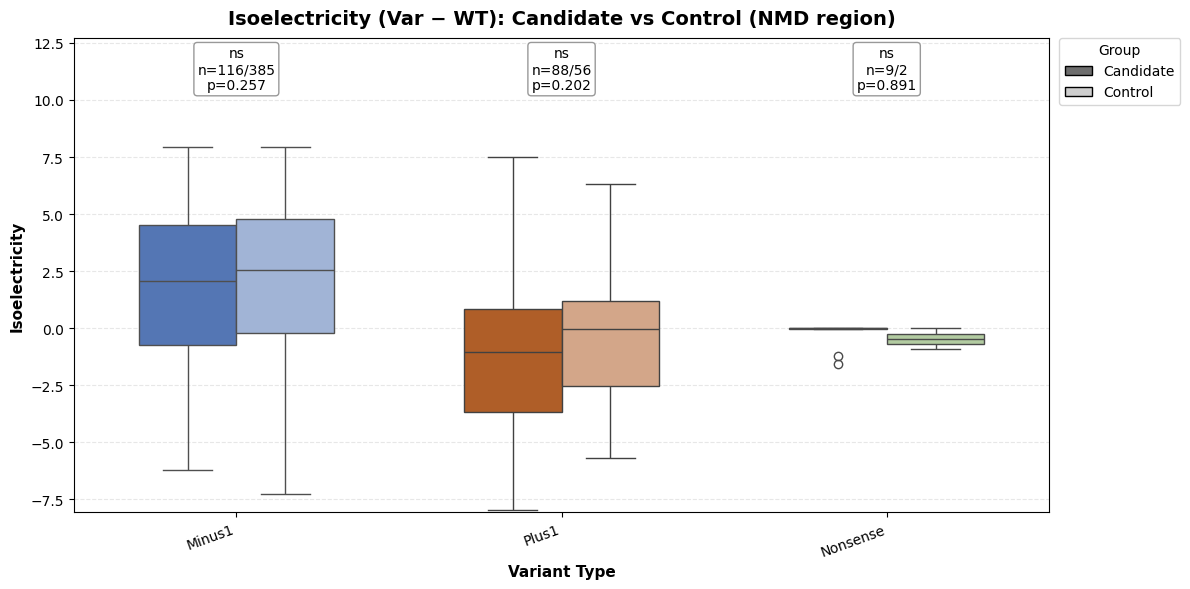

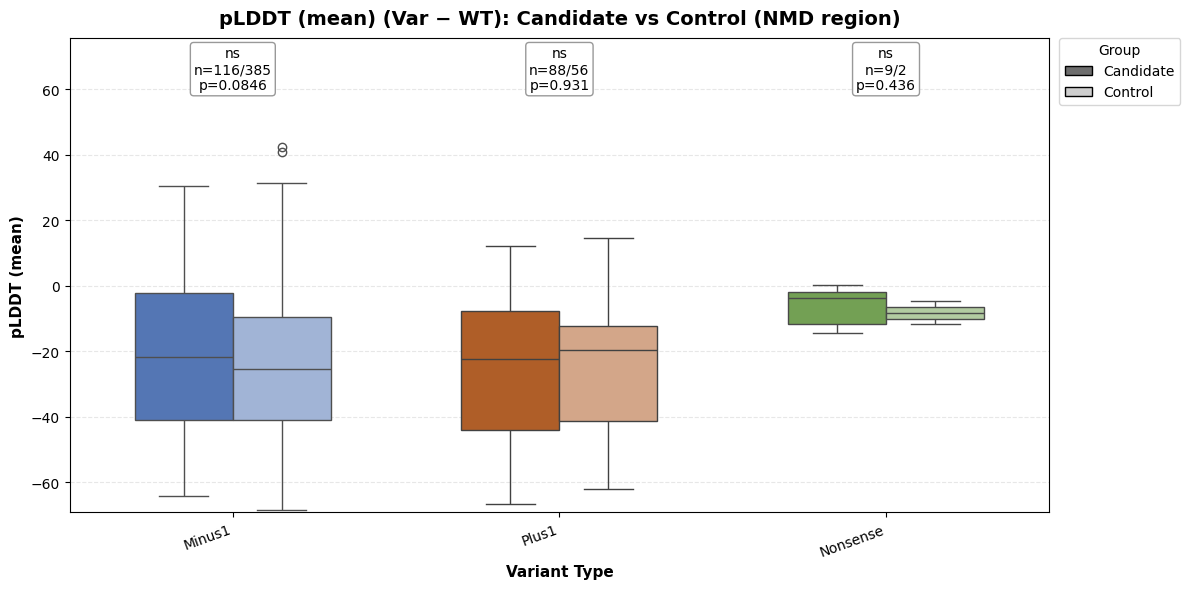

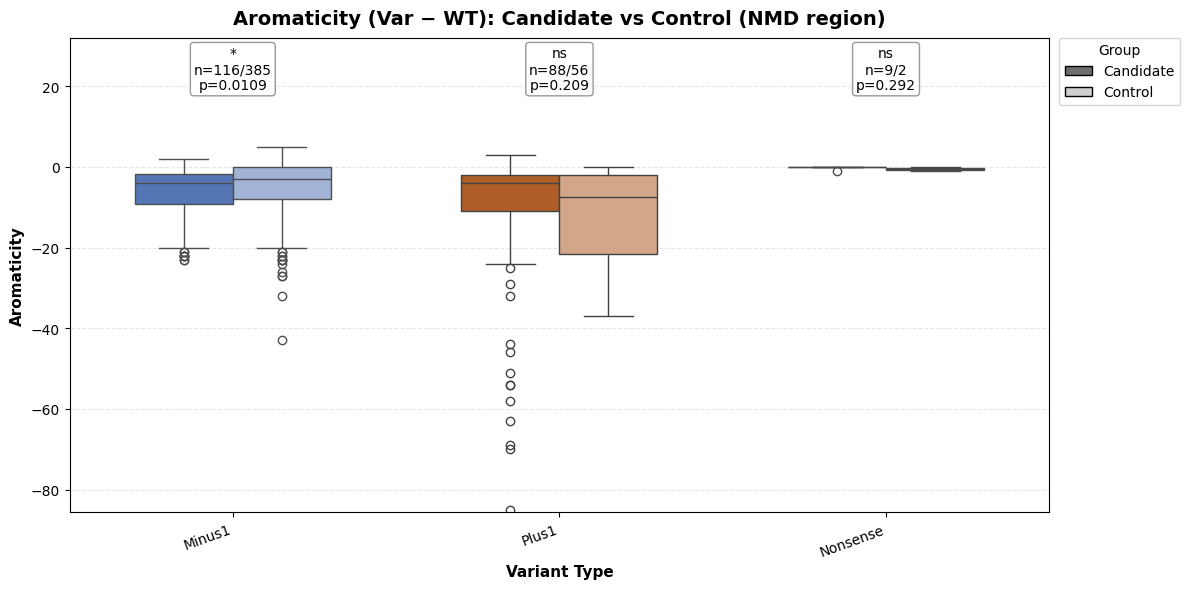

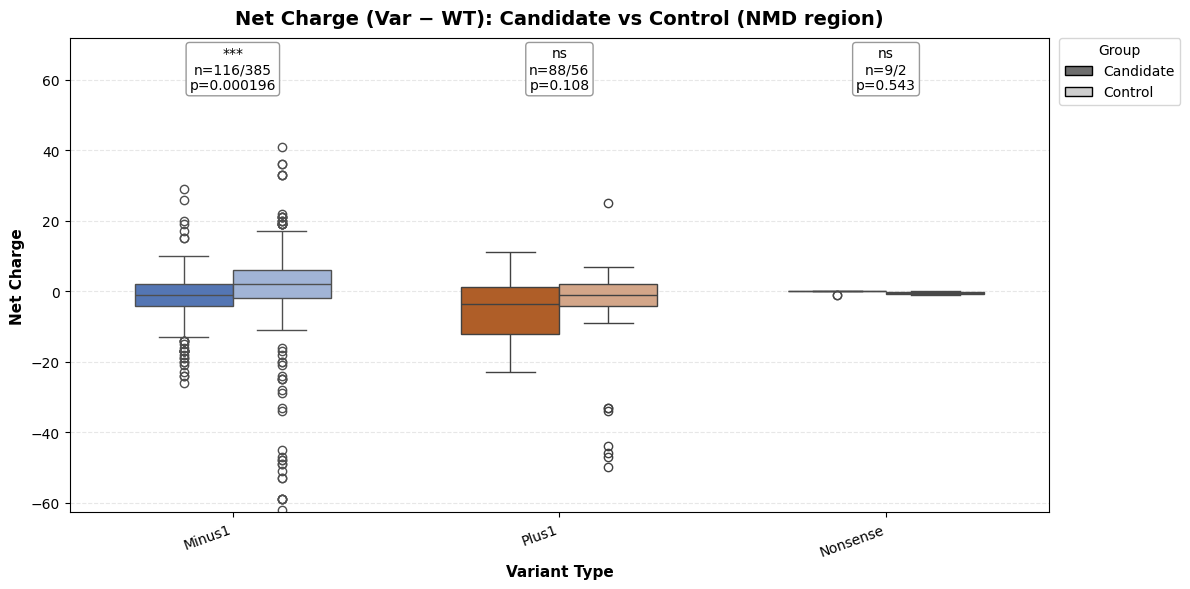

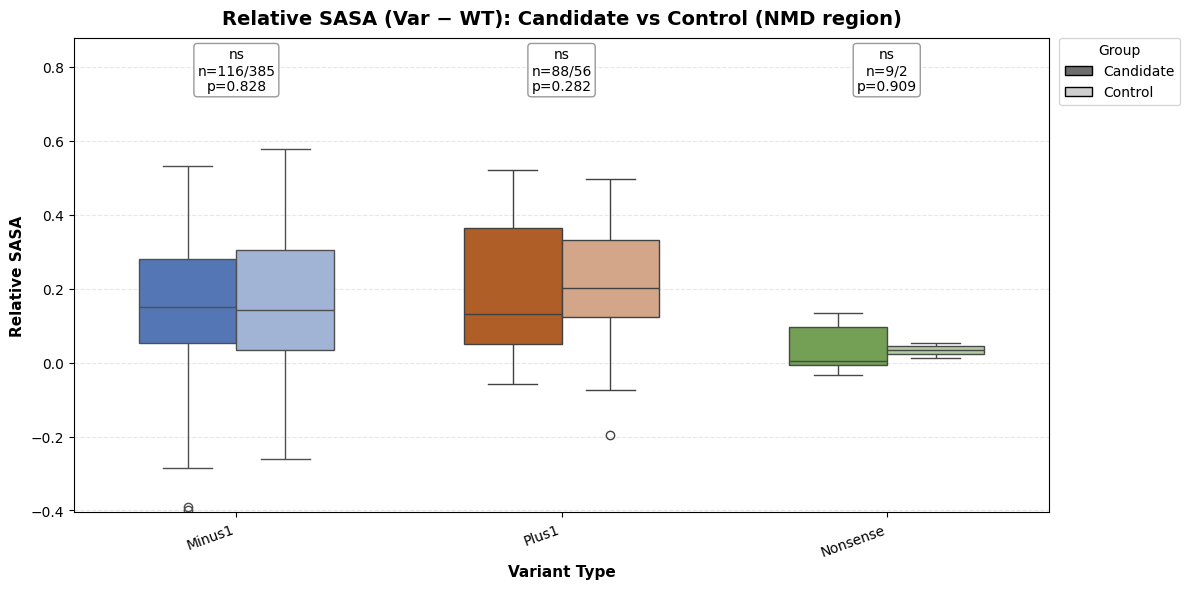

In [12]:
targets = [
    ("pI_Diff",          "Isoelectricity"),
    ("plddt_mean_Diff",  "pLDDT (mean)"),
    ("aromaticity_Diff", "Aromaticity"),
    ("net_charge_Diff", "Net Charge"),
    ("rel_sasa_Diff", "Relative SASA")
]

for col, label in targets:
    plot_diff_candidate_vs_control_colorsafe(
        df=df_NMD_unique, diff_col=col,
        metric_label=label, context_label="NMD region",
        savepath=f"NMD_{col}_Candidate_vs_Control.png"
    )

In [13]:
import re

AA_LETTERS = "ACDEFGHIKLMNPQRSTVWY"

def add_aa_diffs(df: pd.DataFrame, context: str = "FL"):
    """
    Adds per-AA difference columns (Var − WT) for either Full-length (FL) or NMD.
    Handles column name patterns:
      FL : aa_<AA>_WT_FL      vs aa_<AA>_var_FL
      NMD: aa_AA_<AA>_WT_nmd  vs aa_AA_<AA>_vars_nmd
    Returns (df, added_cols, missing_pairs)
    """
    ctx = context.strip().lower()
    if ctx == "fl":
        wt_suf, var_suf, suff_label = "_WT_FL", "_var_FL", "FL"
    else:
        wt_suf, var_suf, suff_label = "_WT_nmd", "_vars_nmd", "NMD"

    # regex that tolerates optional "AA_" and case differences
    rx_wt  = re.compile(rf"^aa_(?:AA_)?([{AA_LETTERS}]){re.escape(wt_suf)}$", re.IGNORECASE)
    rx_var = re.compile(rf"^aa_(?:AA_)?([{AA_LETTERS}]){re.escape(var_suf)}$", re.IGNORECASE)

    wt_cols  = {}
    var_cols = {}

    for c in df.columns:
        m = rx_wt.match(c)
        if m:
            wt_cols[m.group(1).upper()] = c
        m = rx_var.match(c)
        if m:
            var_cols[m.group(1).upper()] = c

    aas = sorted(set(wt_cols) & set(var_cols))
    missing_pairs = sorted(set(AA_LETTERS) - set(aas))

    added = []
    for aa in aas:
        wt_col, var_col = wt_cols[aa], var_cols[aa]
        diff_name = f"aa_{aa}_Diff_{suff_label}"
        df[diff_name] = pd.to_numeric(df[var_col], errors="coerce") - pd.to_numeric(df[wt_col], errors="coerce")
        added.append(diff_name)

    return df, added, missing_pairs


In [14]:
# Full-length
df_collapsed, added_fl, missing_fl = add_aa_diffs(df_collapsed, context="FL")
print("Added (FL):", len(added_fl), "columns")
if missing_fl: print("No WT/Var pair for (FL):", missing_fl)

# NMD
df_NMD_unique, added_nmd, missing_nmd = add_aa_diffs(df_NMD_unique, context="NMD")
print("Added (NMD):", len(added_nmd), "columns")
if missing_nmd: print("No WT/Var pair for (NMD):", missing_nmd)

# Quick peek
print(df_collapsed[[c for c in df_collapsed.columns if c.startswith("aa_") and c.endswith("_Diff_FL")]].head())
df_NMD_unique[[c for c in df_NMD_unique.columns if c.startswith("aa_") and c.endswith("_Diff_NMD")]].head()

Added (FL): 20 columns
Added (NMD): 20 columns
   aa_A_Diff_FL  aa_C_Diff_FL  aa_D_Diff_FL  aa_E_Diff_FL  aa_F_Diff_FL  \
0         -0.08          0.04         -0.12         -0.30         -0.01   
1         -0.08          0.04         -0.01         -0.07         -0.12   
2         -0.03         -0.33         -1.14          0.69          0.75   
3          0.37         -0.32         -0.41          0.45          0.59   
4          0.15         -0.15         -0.43          0.36          0.22   

   aa_G_Diff_FL  aa_H_Diff_FL  aa_I_Diff_FL  aa_K_Diff_FL  aa_L_Diff_FL  \
0          0.17         -0.35         -0.01         -0.12          0.24   
1         -0.05         -0.24         -0.12         -0.12         -0.09   
2          0.43         -0.30         -0.65          0.20          0.60   
3          0.10         -0.28         -0.63          0.10          0.15   
4         -0.09         -0.12         -0.65          0.04          0.09   

   aa_M_Diff_FL  aa_N_Diff_FL  aa_P_Diff_FL  aa_Q_D

,aa_A_Diff_NMD,aa_C_Diff_NMD,aa_D_Diff_NMD,aa_E_Diff_NMD,aa_F_Diff_NMD,aa_G_Diff_NMD,aa_H_Diff_NMD,aa_I_Diff_NMD,aa_K_Diff_NMD,aa_L_Diff_NMD,aa_M_Diff_NMD,aa_N_Diff_NMD,aa_P_Diff_NMD,aa_Q_Diff_NMD,aa_R_Diff_NMD,aa_S_Diff_NMD,aa_T_Diff_NMD,aa_V_Diff_NMD,aa_W_Diff_NMD,aa_Y_Diff_NMD
0,-1.70,0.74,NaN,NaN,-0.11,2.95,NaN,-0.11,-1.70,4.43,NaN,0.74,-4.13,-1.70,6.87,4.54,-0.84,-0.96,6.13,NaN
1,-0.43,2.17,NaN,NaN,NaN,-2.59,NaN,NaN,-2.59,-0.65,NaN,NaN,4.12,-0.21,NaN,NaN,NaN,-4.97,NaN,NaN
2,-0.80,-3.12,NaN,5.66,NaN,5.66,NaN,-6.26,0.51,6.18,NaN,0.51,-0.80,-8.58,2.54,1.53,10.31,-0.80,NaN,NaN
3,NaN,-3.31,-6.17,2.40,NaN,2.40,NaN,-6.61,NaN,-0.45,NaN,NaN,1.96,NaN,4.82,7.67,2.40,-0.45,NaN,NaN
4,NaN,6.96,NaN,5.65,NaN,NaN,NaN,NaN,NaN,1.30,NaN,NaN,1.30,NaN,NaN,NaN,5.65,1.30,NaN,NaN


In [15]:
# Property map
AA_PROPERTIES = {
    'Nonpolar_Aliphatic': ['A', 'V', 'L', 'I', 'M'],
    'Aromatic':            ['F', 'W', 'Y'],
    'Polar_Uncharged':     ['S', 'T', 'N', 'Q'],
    'Positively_Charged':  ['K', 'R', 'H'],
    'Negatively_Charged':  ['D', 'E'],
    'Special_Cases':       ['C', 'G', 'P'],
}

def add_property_diffs(df, context="FL", aa_props=AA_PROPERTIES):
    """
    Sums per-AA diff columns into property diffs for the given context.
    Expects per-AA columns previously created as:
      FL :  aa_<AA>_Diff_FL
      NMD:  aa_<AA>_Diff_NMD
    Creates columns:
      <Property>_Diff_FL  or  <Property>_Diff_NMD
    """
    ctx = context.strip().upper()
    suff = "_Diff_FL" if ctx == "FL" else "_Diff_NMD"

    created, missing = [], {}
    for prop, letters in aa_props.items():
        cand = [f"aa_{aa}{suff}" for aa in letters]        # e.g., aa_A_Diff_FL
        present = [c for c in cand if c in df.columns]     # tolerate missing AAs
        if present:
            out_col = f"{prop}_Diff_{ctx}"
            # sum across available AAs; NaNs are skipped; all-NaN stays NaN
            df[out_col] = df[present].sum(axis=1, min_count=1)
            created.append(out_col)
        else:
            missing[prop] = cand
    return df, created, missing

In [16]:
# Full-length
df_collapsed, props_fl, miss_fl = add_property_diffs(df_collapsed, context="FL")
print("Created (FL):", props_fl)

# NMD
df_NMD_unique, props_nmd, miss_nmd = add_property_diffs(df_NMD_unique, context="NMD")
print("Created (NMD):", props_nmd)

Created (FL): ['Nonpolar_Aliphatic_Diff_FL', 'Aromatic_Diff_FL', 'Polar_Uncharged_Diff_FL', 'Positively_Charged_Diff_FL', 'Negatively_Charged_Diff_FL', 'Special_Cases_Diff_FL']
Created (NMD): ['Nonpolar_Aliphatic_Diff_NMD', 'Aromatic_Diff_NMD', 'Polar_Uncharged_Diff_NMD', 'Positively_Charged_Diff_NMD', 'Negatively_Charged_Diff_NMD', 'Special_Cases_Diff_NMD']


In [17]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib.patches import Patch
from scipy.stats import mannwhitneyu

FAMILY_COLOR = {'Minus1':'#4472C4', 'Plus1':'#C65911', 'Nonsense':'#70AD47'}

def lighten_color(color, amount=0.55):
    r, g, b = mcolors.to_rgb(color)
    return (1 - amount) + amount*r, (1 - amount) + amount*g, (1 - amount) + amount*b

def plot_properties_one_panel(
    df,
    prop_cols,              # list like ["Aromatic_Diff_NMD","Nonpolar_Aliphatic_Diff_NMD",...]
    category="Minus1",      # "Minus1" | "Plus1" | "Nonsense"
    context_label="NMD region",   # or "Full length"
    savepath=None,
    order_props=None        # optional custom order of property names
):
    # --- tidy up to long form ---
    long = df[prop_cols + ["source"]].copy()

    # map source → group & family
    g = long["source"].astype(str)
    g = g.str.replace("snv_control","Nonsense_Control",case=False,regex=False)\
         .str.replace("snv","Nonsense",case=False,regex=False)\
         .str.replace("minus1_control","Minus1_Control",case=False,regex=False)\
         .str.replace("plus1_control","Plus1_Control",case=False,regex=False)\
         .str.replace("minus1","Minus1",case=False,regex=False)\
         .str.replace("plus1","Plus1",case=False,regex=False)
    long["group"]  = g
    long["family"] = long["group"].str.replace("_Control","",regex=False)
    long["status"] = np.where(long["group"].str.endswith("_Control"), "Control", "Candidate")

    # keep the chosen family
    long = long[long["family"] == category]
    if long.empty:
        print(f"No rows for category={category}.")
        return None, None

    # melt: each column -> row with property name and value
    melted = long.melt(id_vars=["group","family","status","source"], var_name="prop_col", value_name="value")
    # property name without suffix
    melted["property"] = (
        melted["prop_col"]
        .str.replace("_Diff_NMD","", regex=False)
        .str.replace("_Diff_FL","",  regex=False)
        .str.replace("_", " ")
    )
    melted["value"] = pd.to_numeric(melted["value"], errors="coerce")

    # drop properties that are entirely NaN
    good_props = melted.groupby("property")["value"].apply(lambda s: s.notna().any())
    melted = melted[melted["property"].isin(good_props[good_props].index)]

    if order_props is None:
        order_props = sorted(melted["property"].unique(), key=lambda s: s.lower())

    # --- plotting ---
    fig, ax = plt.subplots(figsize=(14, 7))
    ax.grid(True, axis="y", alpha=0.3, linestyle="--"); ax.set_axisbelow(True)

    base = FAMILY_COLOR.get(category, "#777")
    pal = {"Candidate": base, "Control": lighten_color(base)}

    sns.boxplot(
        data=melted, x="property", y="value",
        hue="status", hue_order=["Candidate","Control"],
        order=order_props, palette=pal, width=0.65, dodge=True, ax=ax, legend=False
    )

    # stats per property (Mann–Whitney, two-sided)
    y_max = float(np.nanmax(melted["value"]))
    rng = y_max - float(np.nanmin(melted["value"]))
    pad = 0.12 * (rng if rng > 0 else 1.0)
    y_annot = y_max + pad

    def stars(p): return "ns" if p>=0.05 else ("*" if p<0.05 and p>=0.01 else ("**" if p<0.01 and p>=0.001 else "***"))

    for i, prop in enumerate(order_props):
        sub = melted[melted["property"] == prop]
        a = sub.loc[sub["status"]=="Candidate","value"].dropna().to_numpy()
        b = sub.loc[sub["status"]=="Control","value"].dropna().to_numpy()
        if a.size and b.size:
            p = mannwhitneyu(a, b, alternative="two-sided").pvalue
            ax.text(i, y_annot, f"{stars(p)}\n"
                                f"n={a.size}/{b.size}\n"
                                f"p={p:.3g}",
                    ha="center", va="bottom",
                    bbox=dict(boxstyle="round,pad=0.2", fc="white", ec="0.6"),
                    fontsize=10)

    # --- adjust y-limits to leave room for annotation boxes ---
    ymin, ymax = ax.get_ylim()
    ax.set_ylim(ymin, ymax + 24.5)  # add extra headroom

    ax.set_xlabel("Physicochemical Property", fontsize=12, fontweight="bold")
    ax.set_ylabel("Δ AA composition (Var − WT, %)", fontsize=12, fontweight="bold")
    ax.set_title(f"{category}: AA Properties (Var − WT) — Candidate vs Control ({context_label})",
                 fontsize=14, fontweight="bold", pad=10)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha="right")

    # simple legend
    handles = [Patch(facecolor=pal["Candidate"], edgecolor="k", label="Candidate"),
               Patch(facecolor=pal["Control"],   edgecolor="k", label="Control")]
    ax.legend(handles=handles, title="Group", loc="upper left", bbox_to_anchor=(1.01, 1.0))

    plt.tight_layout()
    if savepath:
        fig.savefig(savepath, dpi=300, bbox_inches="tight")
    return fig, ax


/tmp/ipython-input-3618623116.py:104: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha="right")
/tmp/ipython-input-3618623116.py:104: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha="right")
/tmp/ipython-input-3618623116.py:104: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha="right")


(<Figure size 1400x700 with 1 Axes>,
 <Axes: title={'center': 'Nonsense: AA Properties (Var − WT) — Candidate vs Control (NMD region)'}, xlabel='Physicochemical Property', ylabel='Δ AA composition (Var − WT, %)'>)

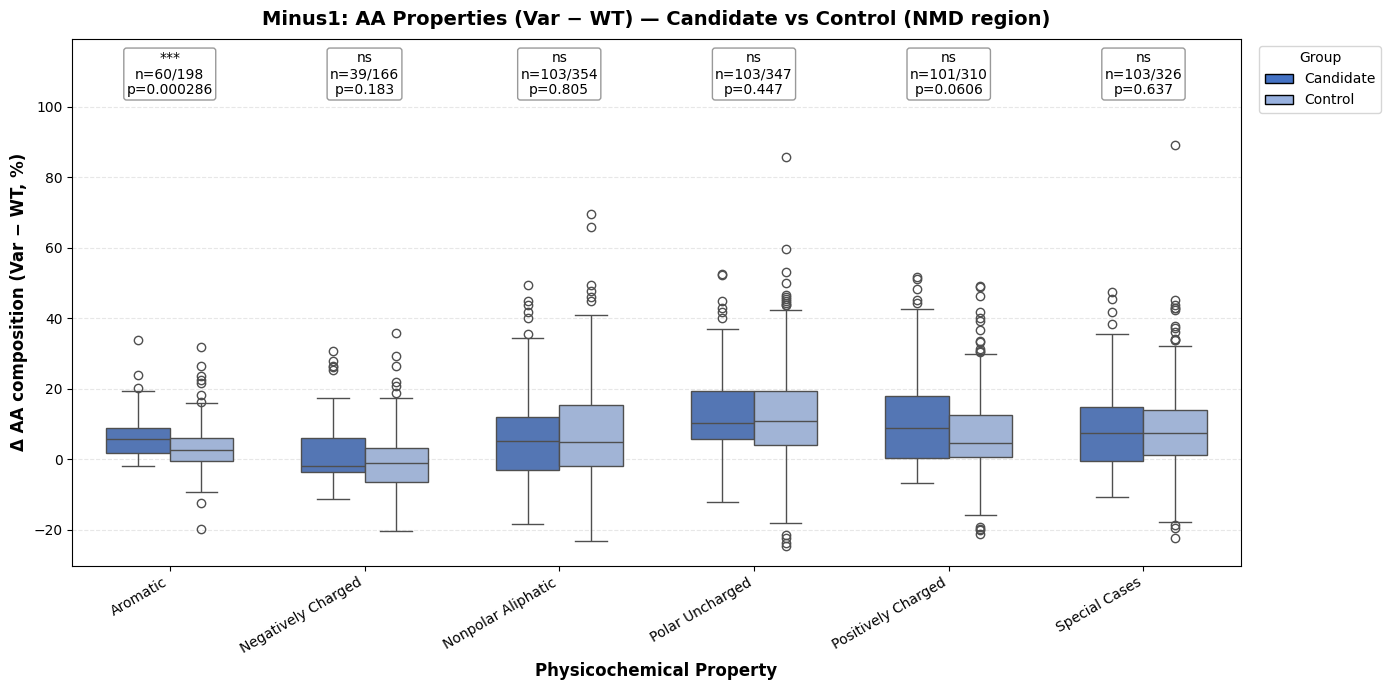

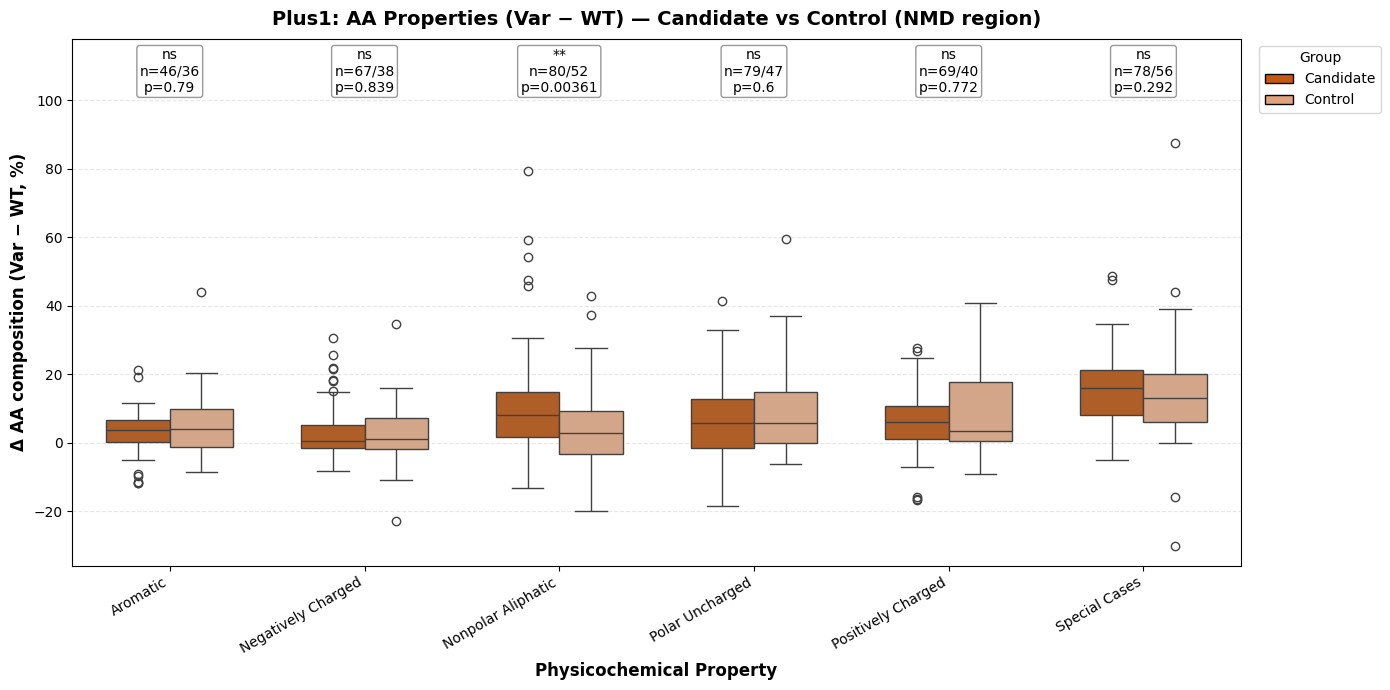

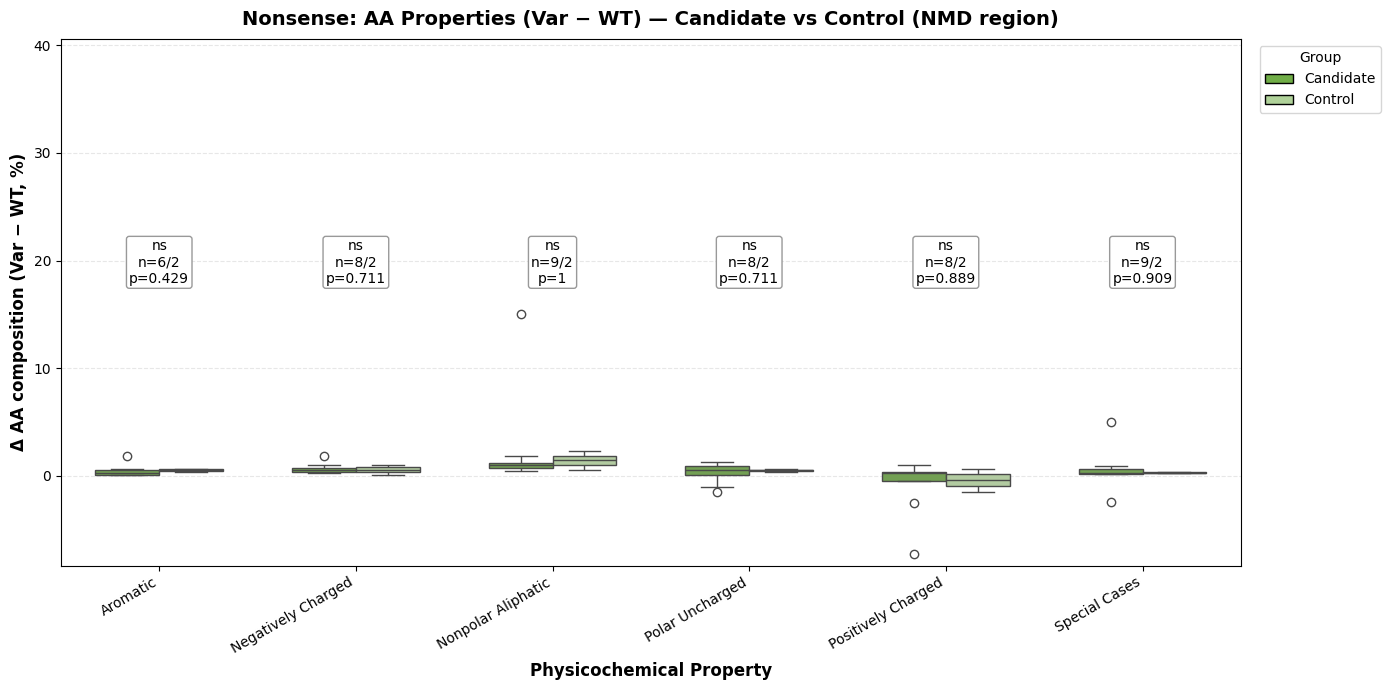

In [18]:
props_nmd = [
    "Nonpolar_Aliphatic_Diff_NMD",
    "Aromatic_Diff_NMD",
    "Polar_Uncharged_Diff_NMD",
    "Positively_Charged_Diff_NMD",
    "Negatively_Charged_Diff_NMD",
    "Special_Cases_Diff_NMD",
]

# One plot per family
plot_properties_one_panel(df_NMD_unique, props_nmd, category="Minus1",
                          context_label="NMD region", savepath="NMD_Minus1_AAprops.png")

plot_properties_one_panel(df_NMD_unique, props_nmd, category="Plus1",
                          context_label="NMD region", savepath="NMD_Plus1_AAprops.png")

plot_properties_one_panel(df_NMD_unique, props_nmd, category="Nonsense",
                          context_label="NMD region", savepath="NMD_Nonsense_AAprops.png")


/tmp/ipython-input-3618623116.py:104: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha="right")
/tmp/ipython-input-3618623116.py:104: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha="right")
/tmp/ipython-input-3618623116.py:104: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha="right")


(<Figure size 1400x700 with 1 Axes>,
 <Axes: title={'center': 'Nonsense: AA Properties (Var − WT) — Candidate vs Control (Full length)'}, xlabel='Physicochemical Property', ylabel='Δ AA composition (Var − WT, %)'>)

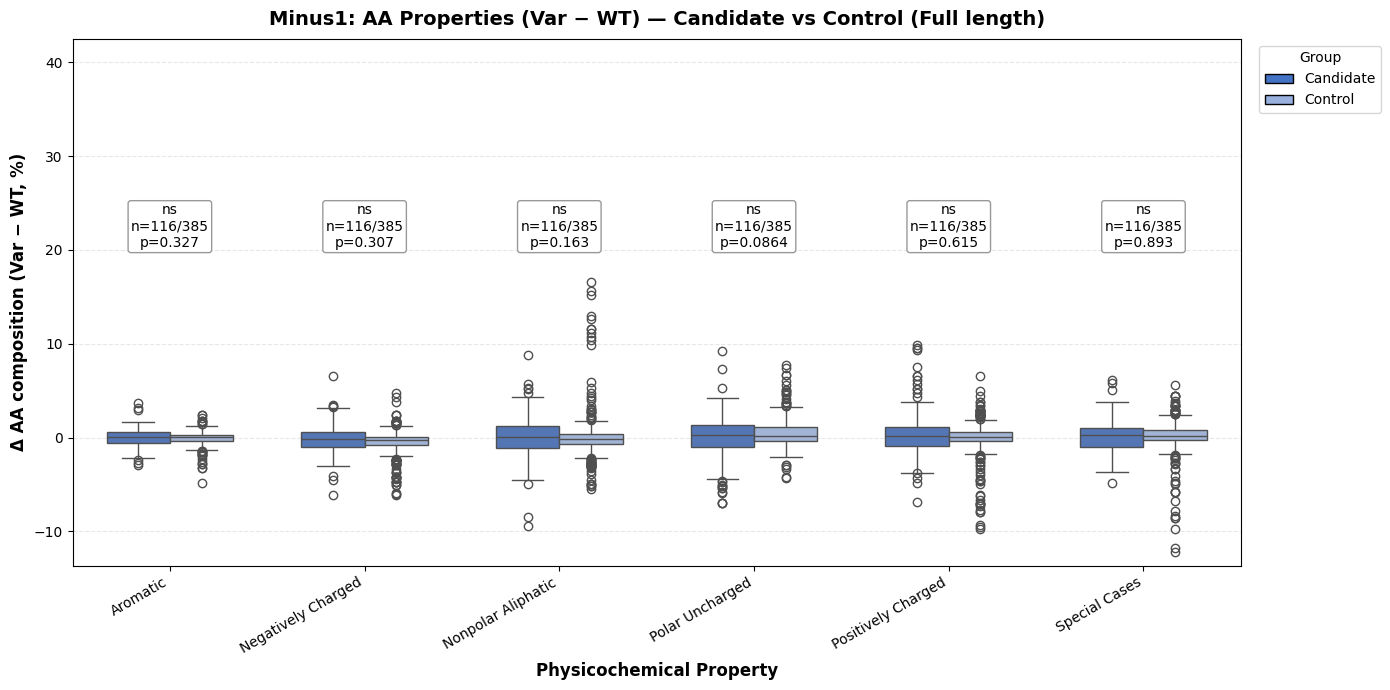

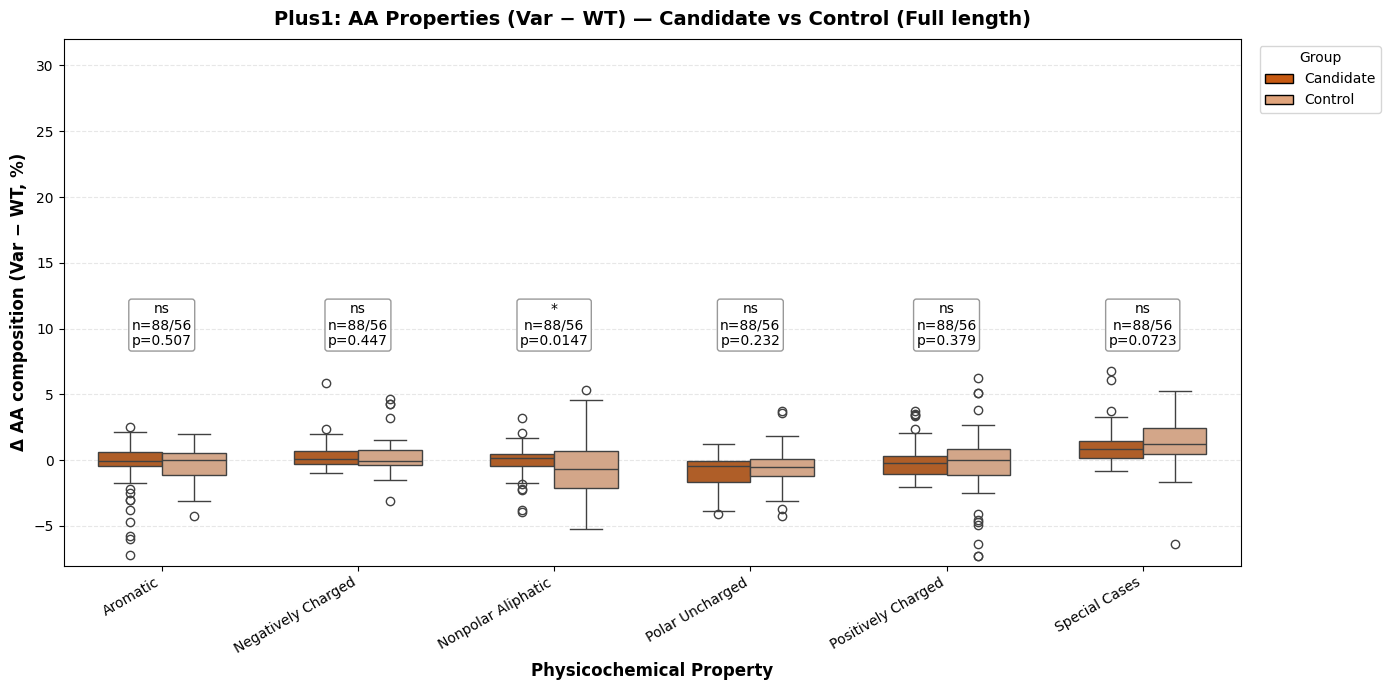

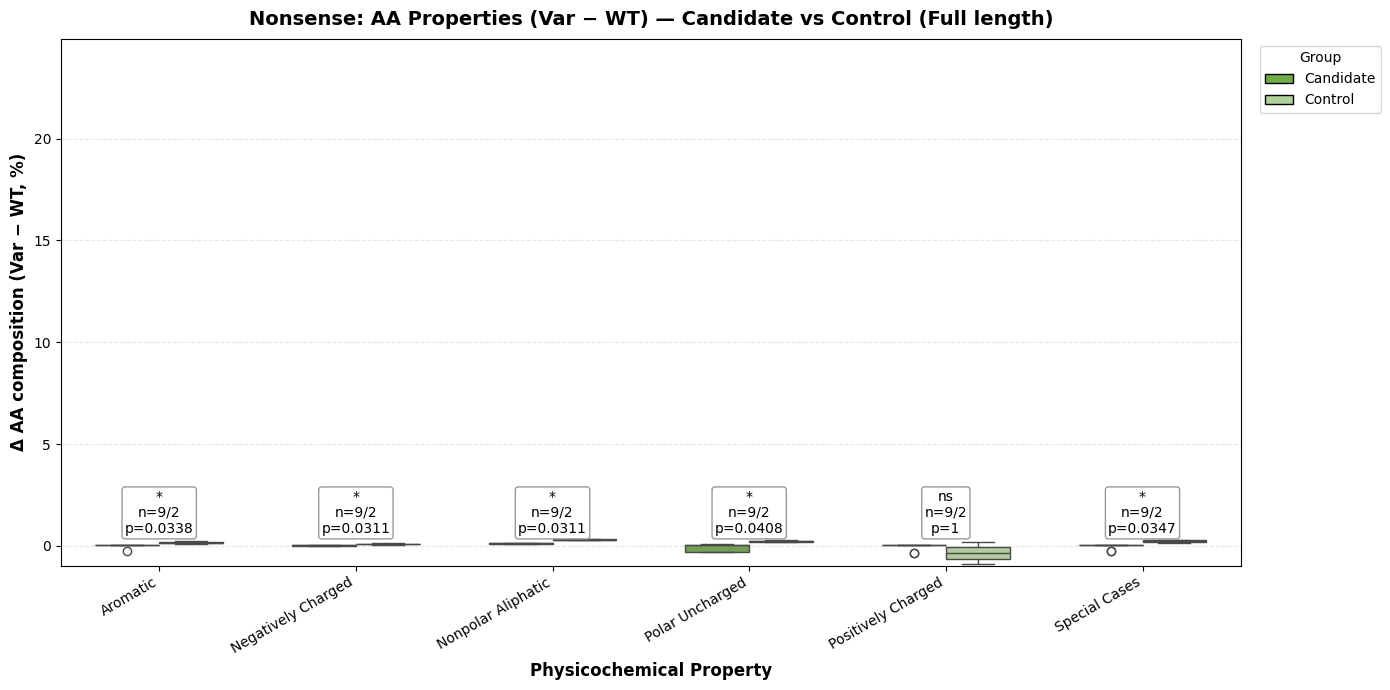

In [19]:
props_fl = [
    "Nonpolar_Aliphatic_Diff_FL",
    "Aromatic_Diff_FL",
    "Polar_Uncharged_Diff_FL",
    "Positively_Charged_Diff_FL",
    "Negatively_Charged_Diff_FL",
    "Special_Cases_Diff_FL",
]

# One plot per family (Full length)
plot_properties_one_panel(
    df_collapsed, props_fl, category="Minus1",
    context_label="Full length", savepath="FL_Minus1_AAprops.png"
)

plot_properties_one_panel(
    df_collapsed, props_fl, category="Plus1",
    context_label="Full length", savepath="FL_Plus1_AAprops.png"
)

plot_properties_one_panel(
    df_collapsed, props_fl, category="Nonsense",
    context_label="Full length", savepath="FL_Nonsense_AAprops.png"
)

In [20]:
df_NMD_unique = df_NMD_unique.copy()  # avoid SettingWithCopyWarning

def add_aa_ratios_nmd(df, epsilon=1e-6):
    """
    WT cols:  aa_AA_<L>_WT_nmd
    Var cols: aa_AA_<L>_vars_nmd
    Makes:    aa_<L>_ratio_nmd, aa_<L>_log2FC_nmd
    Returns:  list of letters like ['K','E','R',...]
    """
    letters = []
    # capture the one-letter AA
    wt_cols = [c for c in df.columns if re.fullmatch(r"aa_AA_[A-Z]_WT_nmd", c)]
    for wt in wt_cols:
        L = re.search(r"aa_AA_([A-Z])_WT_nmd", wt).group(1)
        var = f"aa_AA_{L}_vars_nmd"
        if var in df.columns:
            ratio_col  = f"aa_{L}_ratio_nmd"
            log2fc_col = f"aa_{L}_log2FC_nmd"
            df.loc[:, ratio_col]  = (df[var] + epsilon) / (df[wt] + epsilon)
            df.loc[:, log2fc_col] = np.log2(df[ratio_col])
            letters.append(L)
    return sorted(letters)

aa_letters = add_aa_ratios_nmd(df_NMD_unique)
print("AAs processed:", aa_letters)

AAs processed: ['A', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'V', 'W', 'Y']


In [21]:
# Save to CSV
df_collapsed.to_csv("df_collapsed.csv", index=False)
df_NMD_unique.to_csv("df_NMD_unique.csv", index=False)

In [22]:
# Count group sizes for both
print("NMD group counts:")
print(df_NMD_unique["source"].value_counts())

print("\nFull Length group counts:")
print(df_collapsed["source"].value_counts())

NMD group counts:
source
minus1_control    385
minus1            116
plus1              88
plus1_control      56
snv                 9
snv_control         2
Name: count, dtype: int64

Full Length group counts:
source
minus1_control    385
minus1            116
plus1              88
plus1_control      56
snv                 9
snv_control         2
Name: count, dtype: int64
